# 원본에서 t-Test 진행하여 , p-value 기준 상위 14 col 선정

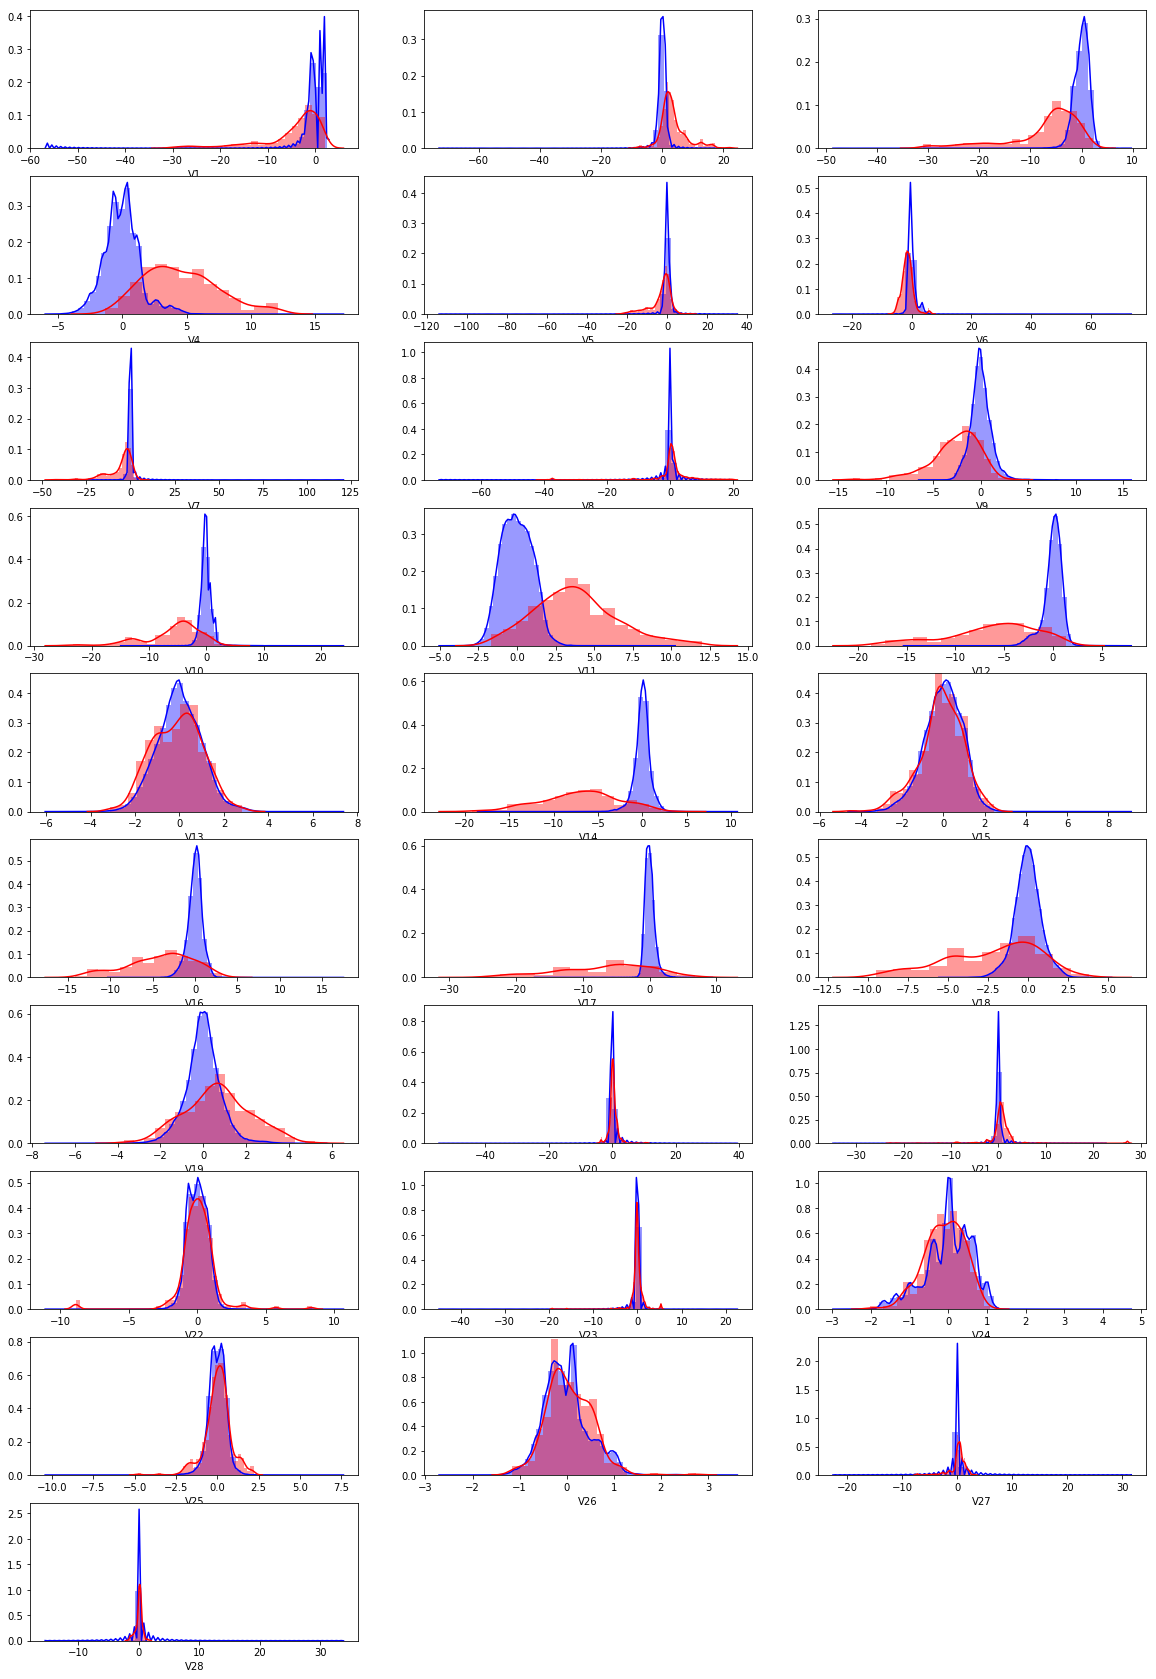

,col_name,p_value,mean_nor,mean_tk,std_nor,std_tk
0,V1,0.000000e+00,0.008258,-4.771948,1.929814,6.783687
17,V18,0.000000e+00,0.003887,-2.246308,0.824919,2.899366
16,V17,0.000000e+00,0.011535,-6.665836,0.749457,6.970618
15,V16,0.000000e+00,0.007164,-4.139946,0.844772,3.865035
11,V12,0.000000e+00,0.010832,-6.259393,0.945939,4.654458
10,V11,0.000000e+00,-0.006576,3.800173,1.003112,2.678605
9,V10,0.000000e+00,0.009824,-5.676883,1.044204,4.897341
8,V9,0.000000e+00,0.004467,-2.581123,1.089372,2.500896
13,V14,0.000000e+00,0.012064,-6.971723,0.897007,4.278940
6,V7,0.000000e+00,0.009637,-5.568731,1.178812,7.206773


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind_from_stats

data=pd.read_csv('creditcard.csv')
#plt.figure(figsize=(60,100))
plt.subplots(figsize=(20, 30))


for k in range(1,29):
    plt.subplot(10,3,k)
    i = data.columns[k]
    
    sns.distplot(data[i][data.Class==0], color="b")
    sns.distplot(data[i][data.Class==1], color="r")
plt.show()  


from scipy.stats import ttest_ind_from_stats

mean_normal = []
std_normal = []
mean_trick = []
std_trick = []
col_name=[]
p_value=[]

for it in data.columns[1:-2]:
    
    m1 = data[it][data.Class==0].mean()
    s1 = data[it][data.Class==0].std()
    m2 = data[it][data.Class==1].mean()
    s2 = data[it][data.Class==1].std()
    
    tstat, p_val = ttest_ind_from_stats(m1,s1, len(data[it][data.Class==0]), m2, s2, len(data[it][data.Class==1]) )
   
    col_name.append(it)
    p_value.append(p_val)
    mean_normal.append(m1)
    std_normal.append(s1)
    mean_trick.append(m2)
    std_trick.append(s2)


temp={'col_name':col_name,'p_value':p_value,'mean_nor':mean_normal,'mean_tk':mean_trick,'std_nor':std_normal,'std_tk':std_trick}
pp=pd.DataFrame(temp)

pp2=pd.DataFrame(pp,columns=['col_name','p_value','mean_nor','mean_tk','std_nor','std_tk'])
pp2.sort_values(by=['p_value'])
#pp.sort_values(by=['index'])

# 선정된 15개 col 기준 Train Data와 Test Data 분리

In [4]:
cols=['V1','V18','V17','V16','V12','V11','V10','V9','V14','V7','V5','V2','V3','V4']
data_nn=pd.DataFrame(data,columns=cols)
data_list=[]

#input data data_numpy 생성
for index,row in data_nn.iterrows():
    data_list.append(data_nn.iloc[index].values)
data_numpy=np.array(data_list)

#input data target 생성
target=np.array(data.Class.values)
target

# Train Data와 Test Data 분리
X_train,X_test=data_numpy[:27000],data_numpy[27000:]
y_train,y_test=target[:27000],target[27000:]

# 신경망 hidden layer size 변경해 가면서 fitting

In [28]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(100,),max_iter=200,alpha=1e-4,solver='sgd',verbose=10,tol=1e-4,random_state=1,learning_rate_init=.1)
mlp.fit(X_train,y_train)

Iteration 1, loss = 0.02157142
Iteration 2, loss = 0.00603532
Iteration 3, loss = 0.00492162
Iteration 4, loss = 0.00518307
Iteration 5, loss = 0.00451630
Iteration 6, loss = 0.00372138
Iteration 7, loss = 0.00340786
Iteration 8, loss = 0.00350651
Iteration 9, loss = 0.00328721
Iteration 10, loss = 0.00308755
Iteration 11, loss = 0.00278435
Iteration 12, loss = 0.00314361
Iteration 13, loss = 0.00259317
Iteration 14, loss = 0.00266425
Iteration 15, loss = 0.00263970
Iteration 16, loss = 0.00234778
Iteration 17, loss = 0.00225093
Iteration 18, loss = 0.00227296
Iteration 19, loss = 0.00204589
Iteration 20, loss = 0.00199903
Iteration 21, loss = 0.00192492
Iteration 22, loss = 0.00203224
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=10,
       warm_start=False)

# 신경망 모델링 평가 Max Score = 0.9986

In [27]:
#hidden layer size 50
print('Training set score:%f' %mlp.score(X_train,y_train))
print('Test set score:%f'%mlp.score(X_test,y_test))

Training set score:0.999519
Test set score:0.998604


In [29]:
#hidden layer size 100
print('Training set score:%f' %mlp.score(X_train,y_train))
print('Test set score:%f'%mlp.score(X_test,y_test))

Training set score:0.999444
Test set score:0.998119


In [22]:
#hidden layer size 14
print('Training set score:%f' %mlp.score(X_train,y_train))
print('Test set score:%f'%mlp.score(X_test,y_test))

Training set score:0.999370
Test set score:0.997886


# Trick Data만 가지고 score 계산시 49.7%, 


# All Data로 Train시에는 77% 까지 올라가지만 이미 모델링에 사용한 Data를 

# 가지고 진행한 평가라 큰 의미는 없어 보임

In [16]:


cols=['V1','V18','V17','V16','V12','V11','V10','V9','V14','V7','V5','V2','V3','V4','Class']
data_trick=pd.DataFrame(data,columns=cols)
trick=data_trick[data_trick.Class==1]
trick_x=trick.drop('Class',axis=1)
trick_x=trick_x.reset_index()
trick_x=trick_x.drop('index',axis=1)
trick_x_list=[]

#input data data_numpy 생성
for index,row in trick_x.iterrows():
    
    trick_x_list.append(trick_x.iloc[index].values)
trick_numpy=np.array(trick_x_list)

#input data target 생성
temp=[1 for i in range(492)]
target_trick=np.array(temp)

Z=trick_numpy
k=target_trick

In [31]:
#hidden layer size 100, trick only
print('Test set score:%f'%mlp.score(Z,k))

Test set score:0.430894


In [35]:
# Train Data로 전부 사용
X_all=data_numpy
y_all=target

In [15]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(20,),max_iter=200,alpha=1e-4,solver='sgd',verbose=10,tol=1e-4,random_state=1,learning_rate_init=.1)
mlp.fit(X_all,y_all)

Iteration 1, loss = 0.00593409
Iteration 2, loss = 0.00337825
Iteration 3, loss = 0.00320230
Iteration 4, loss = 0.00311021
Iteration 5, loss = 0.00302019
Iteration 6, loss = 0.00303640
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=10,
       warm_start=False)

# KNN Classifier 이용한 Classify
Score는 99.88%, Trick Data 기준 Score는 55.48%

In [10]:
from sklearn import neighbors
clf=neighbors.KNeighborsClassifier(weights='uniform')
clf.fit(X_train,y_train)

In [15]:
print("KNN Score:",clf.score(X_test,y_test))

KNN Score: 0.9988634909059878


In [16]:
from sklearn import neighbors
clf=neighbors.KNeighborsClassifier(weights='uniform')
clf.fit(X_train,y_train)


In [20]:
print(clf.score(X_test,y_test))
print(clf.score(Z,k))

0.9988634909059878
0.5548780487804879


# 마무리 하며

Data의 양은 매우 크나, Trick Data 의 비율이 매우 작아서, 일반적인 방식으로는 제대로 모델링 하기가 어려워 보입니다.
정상 Data가 너무 많기 때문에, 정상 만 잘 분류해도 Sore는 기본 0.95 이상이 나옵니다.

Case-Control Sampling을 진행하여 교차확인 진행, Score가 가장 높은 모델을 선택하는 방식을 적용해야 할듯 합니다.


************************
### Tree classifier의 성능이 가장 좋아 보인다

In [5]:
from sklearn import tree
clf_t=tree.DecisionTreeClassifier()
clf_t=clf_t.fit(X_train,y_train)

In [19]:

print("for   test data score: ",clf_t.score(X_test,y_test))
print("trick only data score: ",clf_t.score(Z,k))

for   test data score:  0.998809186717
trick only data score:  0.640243902439


************************
### K-Means Clustering

In [22]:
from sklearn.cluster import KMeans
est=KMeans(n_clusters=2)
est.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

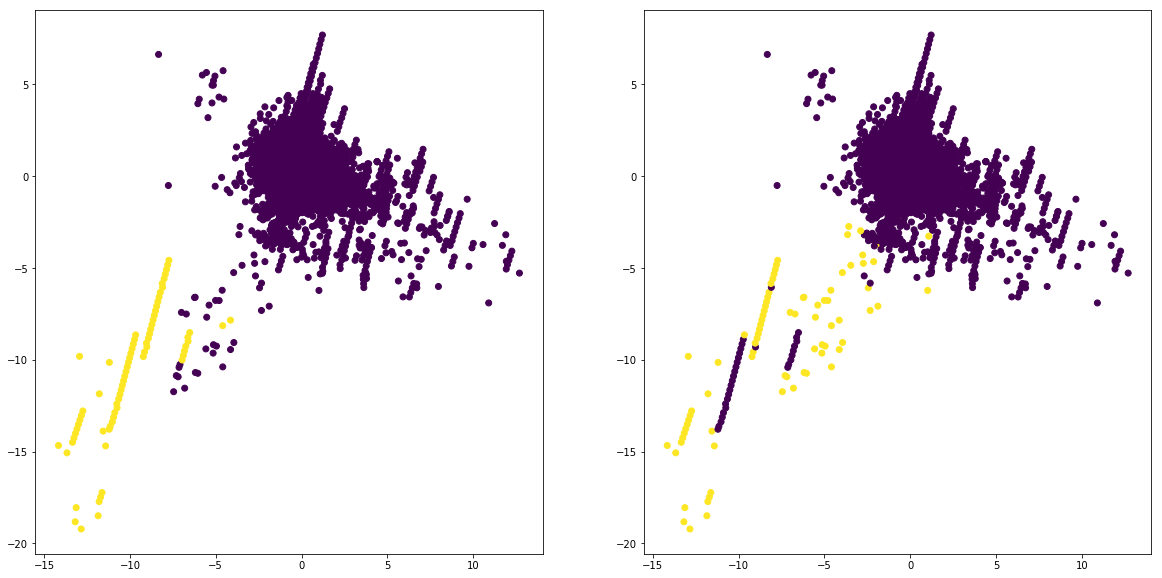

In [33]:
labels=est.labels_
plt.subplots(figsize=(20, 10))
plt.subplot(121)
plt.scatter(X_train[:,6],X_train[:,8],c=labels)
plt.subplot(122)
plt.scatter(X_train[:,6],X_train[:,8],c=y_train)
plt.show()

In [40]:
est.fit(X_all)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

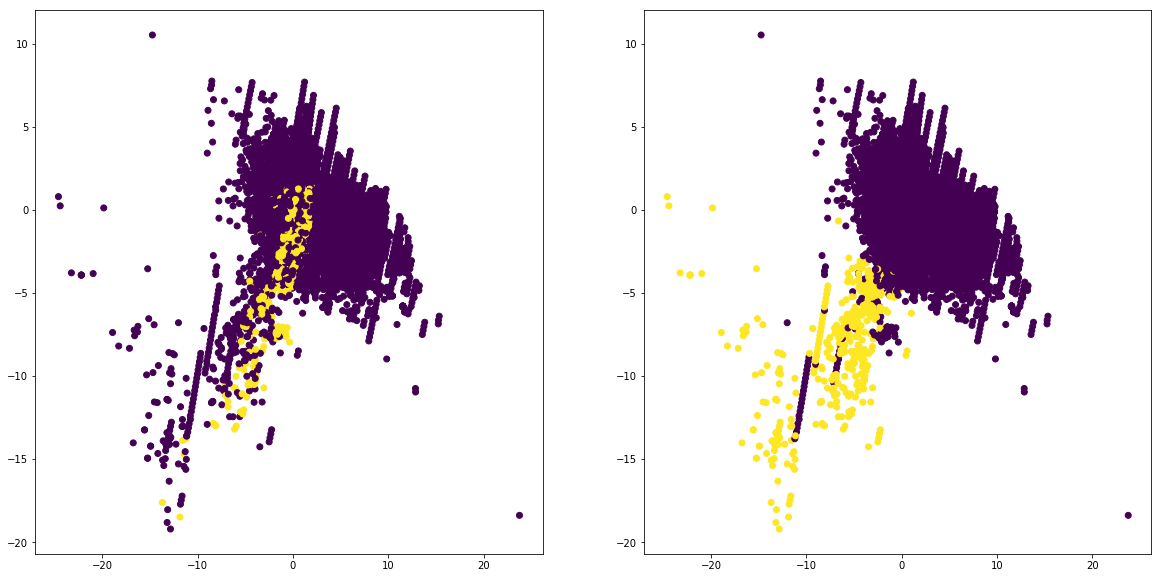

In [41]:
labels=est.labels_
plt.subplots(figsize=(20, 10))
plt.subplot(121)
plt.scatter(X_all[:,6],X_all[:,8],c=labels)
plt.subplot(122)
plt.scatter(X_all[:,6],X_all[:,8],c=y_all)
plt.show()

In [39]:
y_all

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)